<a href="https://colab.research.google.com/github/JHyunjun/AnomalyDetection/blob/main/240905_EachGroup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# # TensorFlow 버전 출력
# print("TensorFlow 버전:", tf.__version__)

# # 사용 가능한 GPU 목록 확인
# gpus = tf.config.list_physical_devices('GPU')
# print("사용 가능한 GPU:", gpus)

# if gpus:
#     # GPU가 감지되면 간단한 연산 수행
#     with tf.device('/GPU:0'):
#         a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
#         b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
#         c = tf.matmul(a, b)
#         print("GPU에서 수행된 행렬 곱셈 결과:")
#         print(c)
# else:
#     print("GPU를 찾을 수 없습니다. CPU에서 실행됩니다.")

# # 현재 사용 중인 장치 확인
# print("현재 사용 중인 장치:", tf.test.gpu_device_name())

# # GPU 사용 가능 여부 확인
# print("GPU 사용 가능:", tf.test.is_built_with_cuda())

In [ ]:
# import pandas as pd
# import numpy as np

# # 데이터 로드
# TRAIN_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/train/train.csv")
# TEST_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/test/test.csv")

# # 그룹별로 특성 분류
# feature_groups = {
#     'A': ['A_1', 'A_2', 'A_3', 'A_4', 'A_5', 'A_6', 'A_7'],
#     'B': ['B_1', 'B_2', 'B_3', 'B_4', 'B_5', 'B_6', 'B_7', 'B_8', 'B_9', 'B_10'],
#     'C': ['C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9', 'C_10'],
#     'D': ['D_1', 'D_2', 'D_3', 'D_4', 'D_5', 'D_6', 'D_7', 'D_8', 'D_9', 'D_10'],
#     'E': ['E_1', 'E_2', 'E_3', 'E_4', 'E_5', 'E_6', 'E_7', 'E_8', 'E_9', 'E_10'],
#     'F': ['F_1', 'F_2']
# }

# # Min/Max 정규화 함수
# def min_max_normalize(df, min_vals, max_vals):
#     return (df - min_vals) / (max_vals - min_vals)

# # 그룹별 데이터프레임 생성 및 정규화
# for group, features in feature_groups.items():
#     # TRAIN 데이터 처리
#     train_df = TRAIN_DF_RAW[features]
#     train_min = train_df.min()
#     train_max = train_df.max()

#     globals()[f'TRAIN_DF_{group}'] = min_max_normalize(train_df, train_min, train_max)

#     # TEST 데이터 처리 (TRAIN의 min, max 사용)
#     test_df = TEST_DF_RAW[features]
#     globals()[f'TEST_DF_{group}'] = min_max_normalize(test_df, train_min, train_max)

# # 생성된 데이터프레임 확인 및 기본 통계 출력
# for group in feature_groups.keys():
#     train_df = globals()[f'TRAIN_DF_{group}']
#     test_df = globals()[f'TEST_DF_{group}']

#     print(f"=== Group {group} ===")
#     print(f"TRAIN_DF_{group} 형태:", train_df.shape)
#     print(f"TEST_DF_{group} 형태:", test_df.shape)

#     print(f"\nTRAIN_DF_{group} 기본 통계:")
#     print(train_df.describe())

#     print(f"\nTEST_DF_{group} 기본 통계:")
#     print(test_df.describe())

#     print("\n" + "="*50 + "\n")

=== Group A ===
TRAIN_DF_A 형태: (496800, 7)
TEST_DF_A 형태: (450000, 7)

TRAIN_DF_A 기본 통계:
                 A_1            A_2            A_3            A_4  \
count  496800.000000  496800.000000  496800.000000  496800.000000   
mean        0.293775       0.578611       0.382381       0.281367   
std         0.254580       0.234654       0.237470       0.084660   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.126271       0.430348       0.311792       0.243155   
50%         0.131158       0.639366       0.326854       0.254143   
75%         0.495309       0.653533       0.550462       0.301496   
max         1.000000       1.000000       1.000000       1.000000   

                 A_5            A_6            A_7  
count  496800.000000  496800.000000  496800.000000  
mean        0.348169       0.163228       0.419117  
std         0.076061       0.045486       0.029974  
min         0.000000       0.000000       0.000000  
25%         0.325426     

In [ ]:
import numpy as np

def create_windows(data, window_size):
    windows = []
    for i in range(len(data) - window_size + 1):
        windows.append(data[i:i+window_size])
    return np.array(windows)

window_size = 12

# 각 그룹에 대해 윈도우 생성
for group in feature_groups.keys():
    train_df = globals()[f'TRAIN_DF_{group}']
    test_df = globals()[f'TEST_DF_{group}']

    # TRAIN 데이터에 대한 윈도우 생성
    train_windows = create_windows(train_df.values, window_size)
    globals()[f'TRAIN_WINDOWS_{group}'] = train_windows

    # TEST 데이터에 대한 윈도우 생성
    test_windows = create_windows(test_df.values, window_size)
    globals()[f'TEST_WINDOWS_{group}'] = test_windows

    print(f"=== Group {group} ===")
    print(f"Original TRAIN_DF_{group} shape:", train_df.shape)
    print(f"After windowing, TRAIN_WINDOWS_{group} shape:", train_windows.shape)
    print(f"\nOriginal TEST_DF_{group} shape:", test_df.shape)
    print(f"After windowing, TEST_WINDOWS_{group} shape:", test_windows.shape)
    print("\n" + "="*50 + "\n")

=== Group A ===
Original TRAIN_DF_A shape: (496800, 7)
After windowing, TRAIN_WINDOWS_A shape: (496789, 12, 7)

Original TEST_DF_A shape: (450000, 7)
After windowing, TEST_WINDOWS_A shape: (449989, 12, 7)


=== Group B ===
Original TRAIN_DF_B shape: (496800, 10)
After windowing, TRAIN_WINDOWS_B shape: (496789, 12, 10)

Original TEST_DF_B shape: (450000, 10)
After windowing, TEST_WINDOWS_B shape: (449989, 12, 10)


=== Group C ===
Original TRAIN_DF_C shape: (496800, 10)
After windowing, TRAIN_WINDOWS_C shape: (496789, 12, 10)

Original TEST_DF_C shape: (450000, 10)
After windowing, TEST_WINDOWS_C shape: (449989, 12, 10)


=== Group D ===
Original TRAIN_DF_D shape: (496800, 10)
After windowing, TRAIN_WINDOWS_D shape: (496789, 12, 10)

Original TEST_DF_D shape: (450000, 10)
After windowing, TEST_WINDOWS_D shape: (449989, 12, 10)


=== Group E ===
Original TRAIN_DF_E shape: (496800, 10)
After windowing, TRAIN_WINDOWS_E shape: (496789, 12, 10)

Original TEST_DF_E shape: (450000, 10)
After w

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# 1D-CNN Autoencoder 모델 정의
def create_autoencoder(input_shape):
    model = models.Sequential([
        # Encoder
        layers.Conv1D(32, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
        layers.Conv1D(16, kernel_size=3, activation='relu', padding='same'),
        layers.Conv1D(8, kernel_size=3, activation='relu', padding='same'),

        # Decoder
        layers.Conv1D(8, kernel_size=3, activation='relu', padding='same'),
        layers.Conv1D(16, kernel_size=3, activation='relu', padding='same'),
        layers.Conv1D(32, kernel_size=3, activation='relu', padding='same'),
        layers.Conv1D(input_shape[-1], kernel_size=3, activation='linear', padding='same')
    ])
    return model

# 각 그룹에 대해 모델 생성 및 학습
for group in feature_groups.keys():
    print(f"Processing group {group}")

    # 데이터 준비
    train_data = globals()[f'TRAIN_WINDOWS_{group}']
    test_data = globals()[f'TEST_WINDOWS_{group}']

    # 입력 형태 정의 (시계열 길이, 특성 수)
    input_shape = (train_data.shape[1], train_data.shape[2])

    # 모델 생성
    model = create_autoencoder(input_shape)
    model.compile(optimizer='adam', loss='mse')

    # 모델 학습
    history = model.fit(
        train_data, train_data,
        epochs=10,
        batch_size=32,
        validation_split=0.1,
        verbose=1
    )

    # 모델 평가
    test_loss = model.evaluate(test_data, test_data, verbose=0)
    print(f"Test loss for group {group}: {test_loss}")

    # 모델 저장
    model.save(f'autoencoder_model_{group}.h5')

    print(f"Finished processing group {group}")
    print("=" * 50)

# 학습된 모델을 사용하여 특성 추출 또는 이상 탐지
def extract_features(model, data):
    encoder = models.Model(inputs=model.inputs, outputs=model.layers[2].output)
    return encoder.predict(data)

# 예시: A 그룹의 특성 추출
model_A = models.load_model('autoencoder_model_A.h5')
features_A = extract_features(model_A, globals()['TEST_WINDOWS_A'])
print("Extracted features shape for group A:", features_A.shape)

Processing group A
Epoch 1/10
13973/13973 [==============================] - 47s 3ms/step - loss: 4.9524e-04 - val_loss: 4.2172e-05
Epoch 2/10
13973/13973 [==============================] - 47s 3ms/step - loss: 2.7010e-05 - val_loss: 1.1036e-05
Epoch 3/10
13973/13973 [==============================] - 47s 3ms/step - loss: 1.8892e-05 - val_loss: 2.2101e-05
Epoch 4/10
13973/13973 [==============================] - 46s 3ms/step - loss: 1.5666e-05 - val_loss: 7.0325e-06
Epoch 5/10
13973/13973 [==============================] - 46s 3ms/step - loss: 1.3884e-05 - val_loss: 6.3952e-06
Epoch 6/10
13973/13973 [==============================] - 46s 3ms/step - loss: 1.2985e-05 - val_loss: 5.4694e-06
Epoch 7/10
13973/13973 [==============================] - 46s 3ms/step - loss: 1.0070e-05 - val_loss: 1.0636e-05
Epoch 8/10
13973/13973 [==============================] - 48s 3ms/step - loss: 9.4816e-06 - val_loss: 4.1492e-05
Epoch 9/10
13973/13973 [==============================] - 45s 3ms/step - loss

In [ ]:
# model.save('C:/Users/limit/OneDrive/Desktop\/Deep Learning/Daycon_AD_2408/보험/240901_보험1.240902_onlyCNN_wo85000.h5')
# print("모델이 'ensemble_autoencoder_model.h5' 파일로 저장되었습니다.")

14063/14063 [==============================] - 16s 1ms/step
Group A:
Train Error - Mean: 0.0000, Std: 0.0001
Test Error  - Mean: 0.0881, Std: 1.0501
14063/14063 [==============================] - 17s 1ms/step
Group B:
Train Error - Mean: 0.0000, Std: 0.0000
Test Error  - Mean: 0.1175, Std: 4.2996
14063/14063 [==============================] - 17s 1ms/step
Group C:
Train Error - Mean: 0.0000, Std: 0.0002
Test Error  - Mean: 0.0011, Std: 0.0171
14063/14063 [==============================] - 15s 1ms/step
Group D:
Train Error - Mean: 0.0000, Std: 0.0001
Test Error  - Mean: 0.5759, Std: 45.1757
14063/14063 [==============================] - 19s 1ms/step
Group E:
Train Error - Mean: 0.0000, Std: 0.0001
Test Error  - Mean: 0.0085, Std: 0.0209
14063/14063 [==============================] - 16s 1ms/step
Group F:
Train Error - Mean: 0.0000, Std: 0.0000
Test Error  - Mean: 0.0000, Std: 0.0000


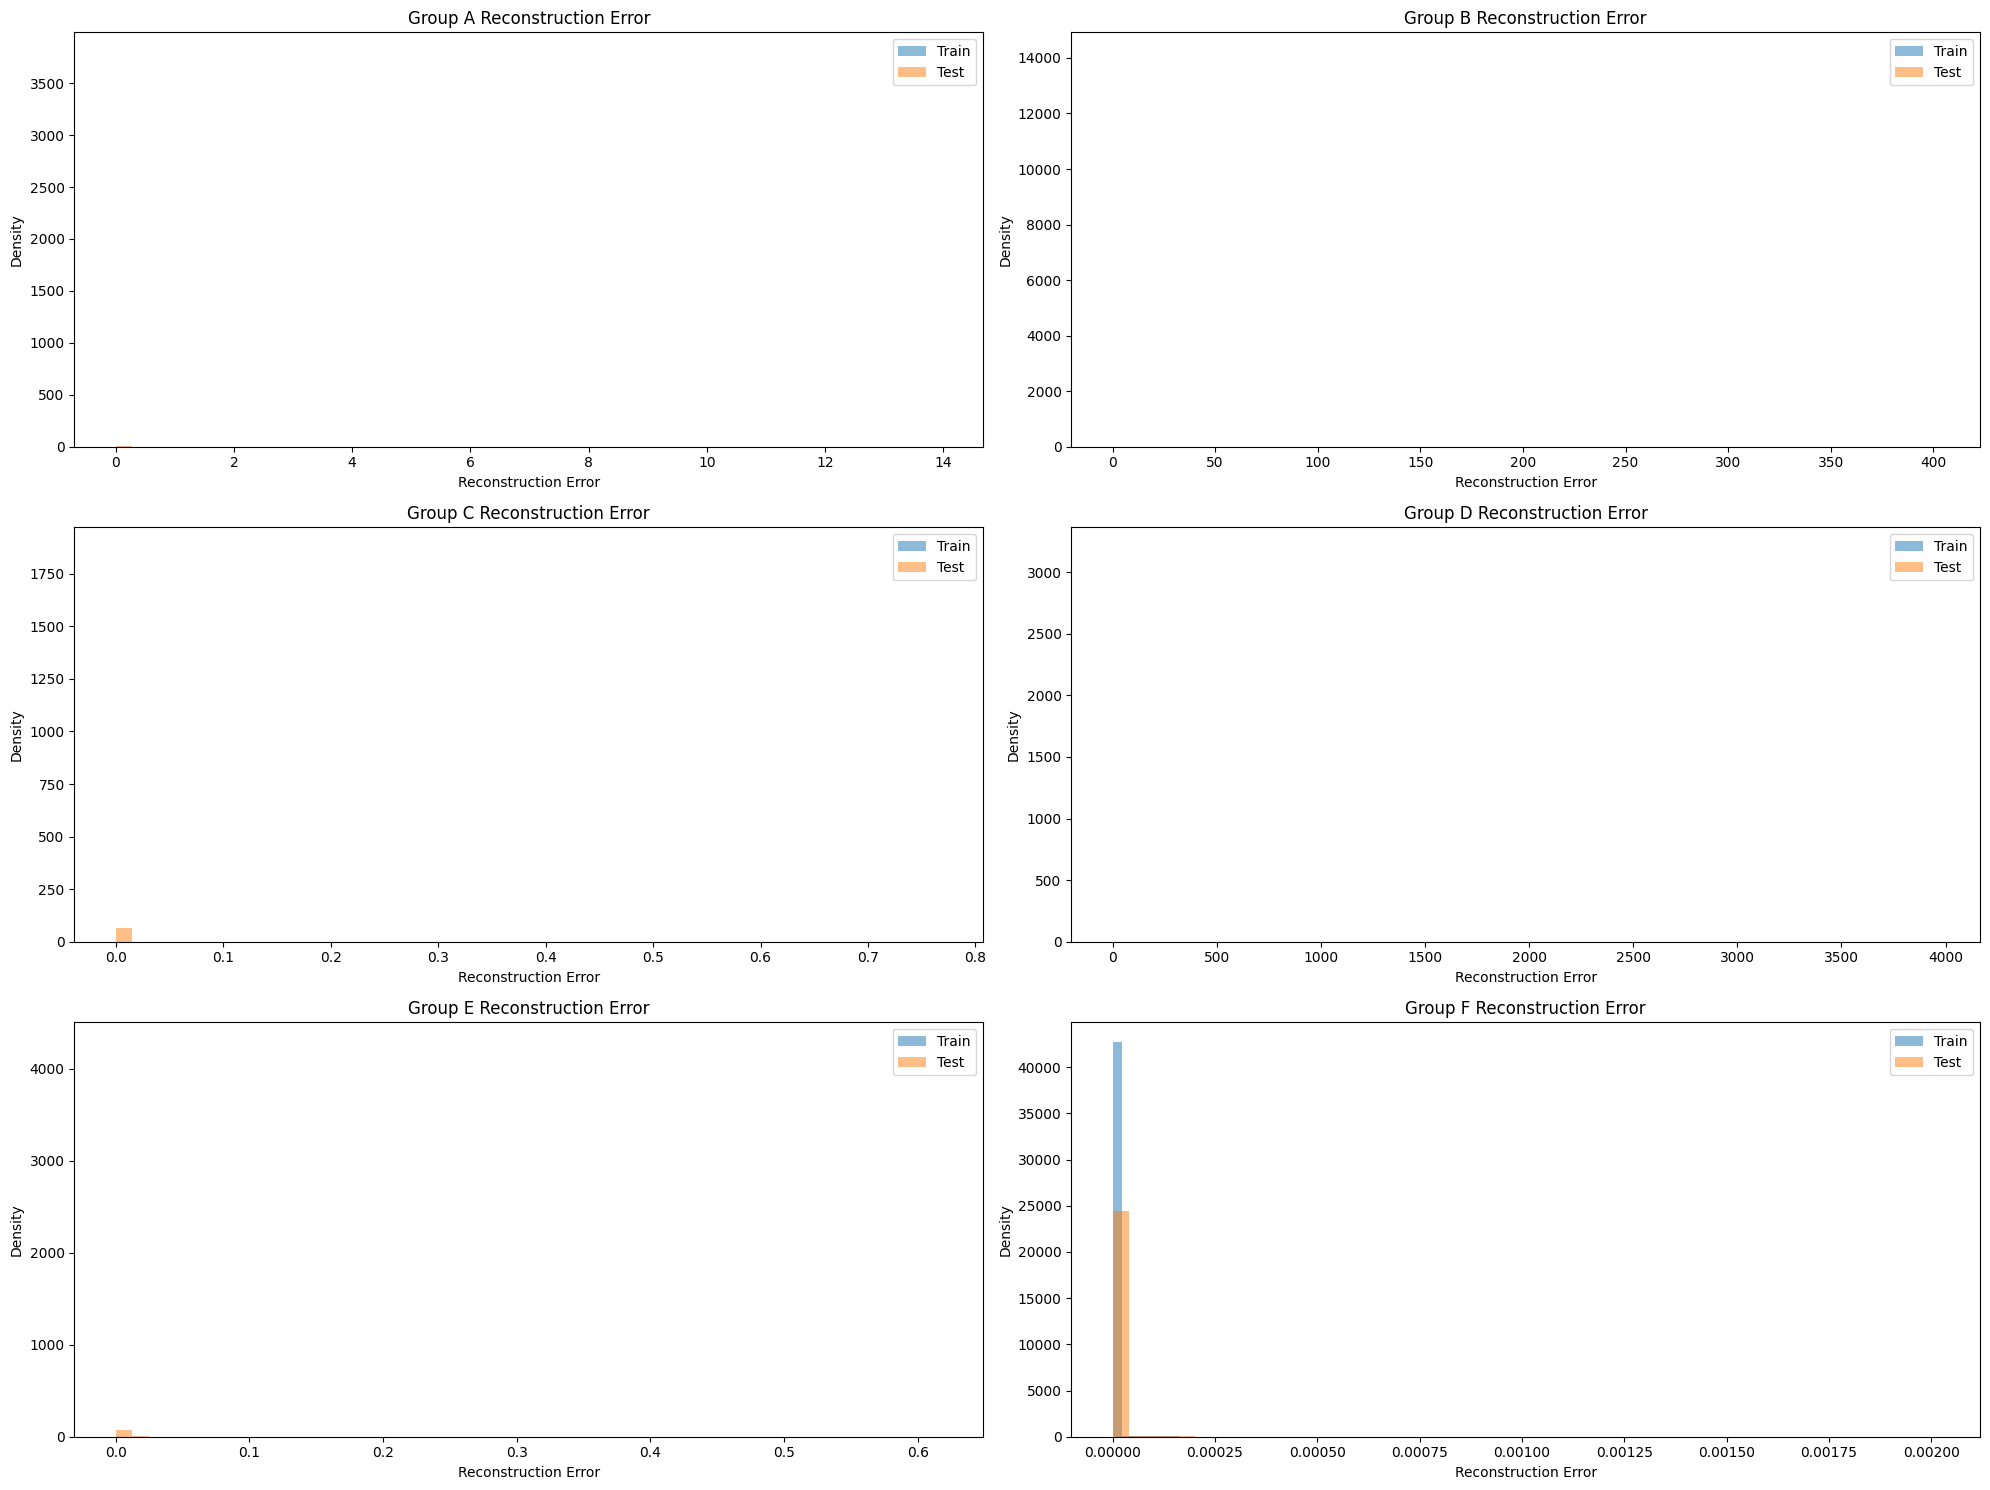

14063/14063 [==============================] - 19s 1ms/step


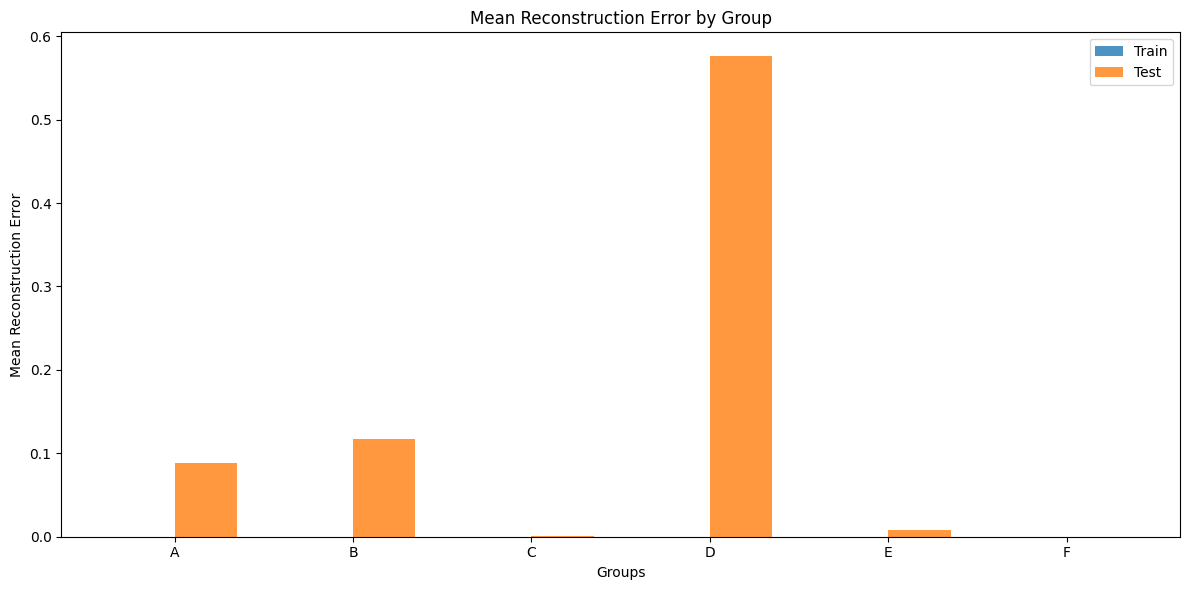

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def calculate_reconstruction_error(model, data):
    predictions = model.predict(data)
    mse = np.mean(np.square(data - predictions), axis=(1, 2))
    return mse

plt.figure(figsize=(20, 15))

for idx, group in enumerate(feature_groups.keys(), 1):
    # 모델 로드
    model = tf.keras.models.load_model(f'autoencoder_model_{group}.h5')

    # Train 데이터 가져오기 및 Reconstruction Error 계산
    train_data = globals()[f'TRAIN_WINDOWS_{group}']
    train_error = calculate_reconstruction_error(model, train_data)

    # Test 데이터 가져오기 및 Reconstruction Error 계산
    test_data = globals()[f'TEST_WINDOWS_{group}']
    test_error = calculate_reconstruction_error(model, test_data)

    # 그래프 그리기
    plt.subplot(3, 2, idx)
    plt.hist(train_error, bins=50, alpha=0.5, label='Train', density=True)
    plt.hist(test_error, bins=50, alpha=0.5, label='Test', density=True)
    plt.title(f'Group {group} Reconstruction Error')
    plt.xlabel('Reconstruction Error')
    plt.ylabel('Density')
    plt.legend()

    # 통계 출력
    print(f"Group {group}:")
    print(f"Train Error - Mean: {np.mean(train_error):.4f}, Std: {np.std(train_error):.4f}")
    print(f"Test Error  - Mean: {np.mean(test_error):.4f}, Std: {np.std(test_error):.4f}")
    print("=" * 50)

plt.tight_layout()
plt.show()

# 모든 그룹의 평균 Reconstruction Error를 바 그래프로 표시
train_errors = []
test_errors = []

for group in feature_groups.keys():
    model = tf.keras.models.load_model(f'autoencoder_model_{group}.h5')

    train_data = globals()[f'TRAIN_WINDOWS_{group}']
    train_error = np.mean(calculate_reconstruction_error(model, train_data))
    train_errors.append(train_error)

    test_data = globals()[f'TEST_WINDOWS_{group}']
    test_error = np.mean(calculate_reconstruction_error(model, test_data))
    test_errors.append(test_error)

plt.figure(figsize=(12, 6))
x = np.arange(len(feature_groups))
width = 0.35

plt.bar(x - width/2, train_errors, width, label='Train', alpha=0.8)
plt.bar(x + width/2, test_errors, width, label='Test', alpha=0.8)

plt.xlabel('Groups')
plt.ylabel('Mean Reconstruction Error')
plt.title('Mean Reconstruction Error by Group')
plt.xticks(x, feature_groups.keys())
plt.legend()

plt.tight_layout()
plt.show()

14063/14063 [==============================] - 19s 1ms/step
Group A:
Train Error - Mean: 0.0000, Std: 0.0001
Test Error  - Mean: 0.0881, Std: 1.0530
14063/14063 [==============================] - 18s 1ms/step
Group B:
Train Error - Mean: 0.0000, Std: 0.0001
Test Error  - Mean: 0.1175, Std: 4.4587
14063/14063 [==============================] - 18s 1ms/step
Group C:
Train Error - Mean: 0.0000, Std: 0.0003
Test Error  - Mean: 0.0011, Std: 0.0176
14063/14063 [==============================] - 18s 1ms/step
Group D:
Train Error - Mean: 0.0000, Std: 0.0001
Test Error  - Mean: 0.5759, Std: 46.7092
14063/14063 [==============================] - 18s 1ms/step
Group E:
Train Error - Mean: 0.0000, Std: 0.0001
Test Error  - Mean: 0.0085, Std: 0.0223
14063/14063 [==============================] - 19s 1ms/step
Group F:
Train Error - Mean: 0.0000, Std: 0.0001
Test Error  - Mean: 0.0000, Std: 0.0001


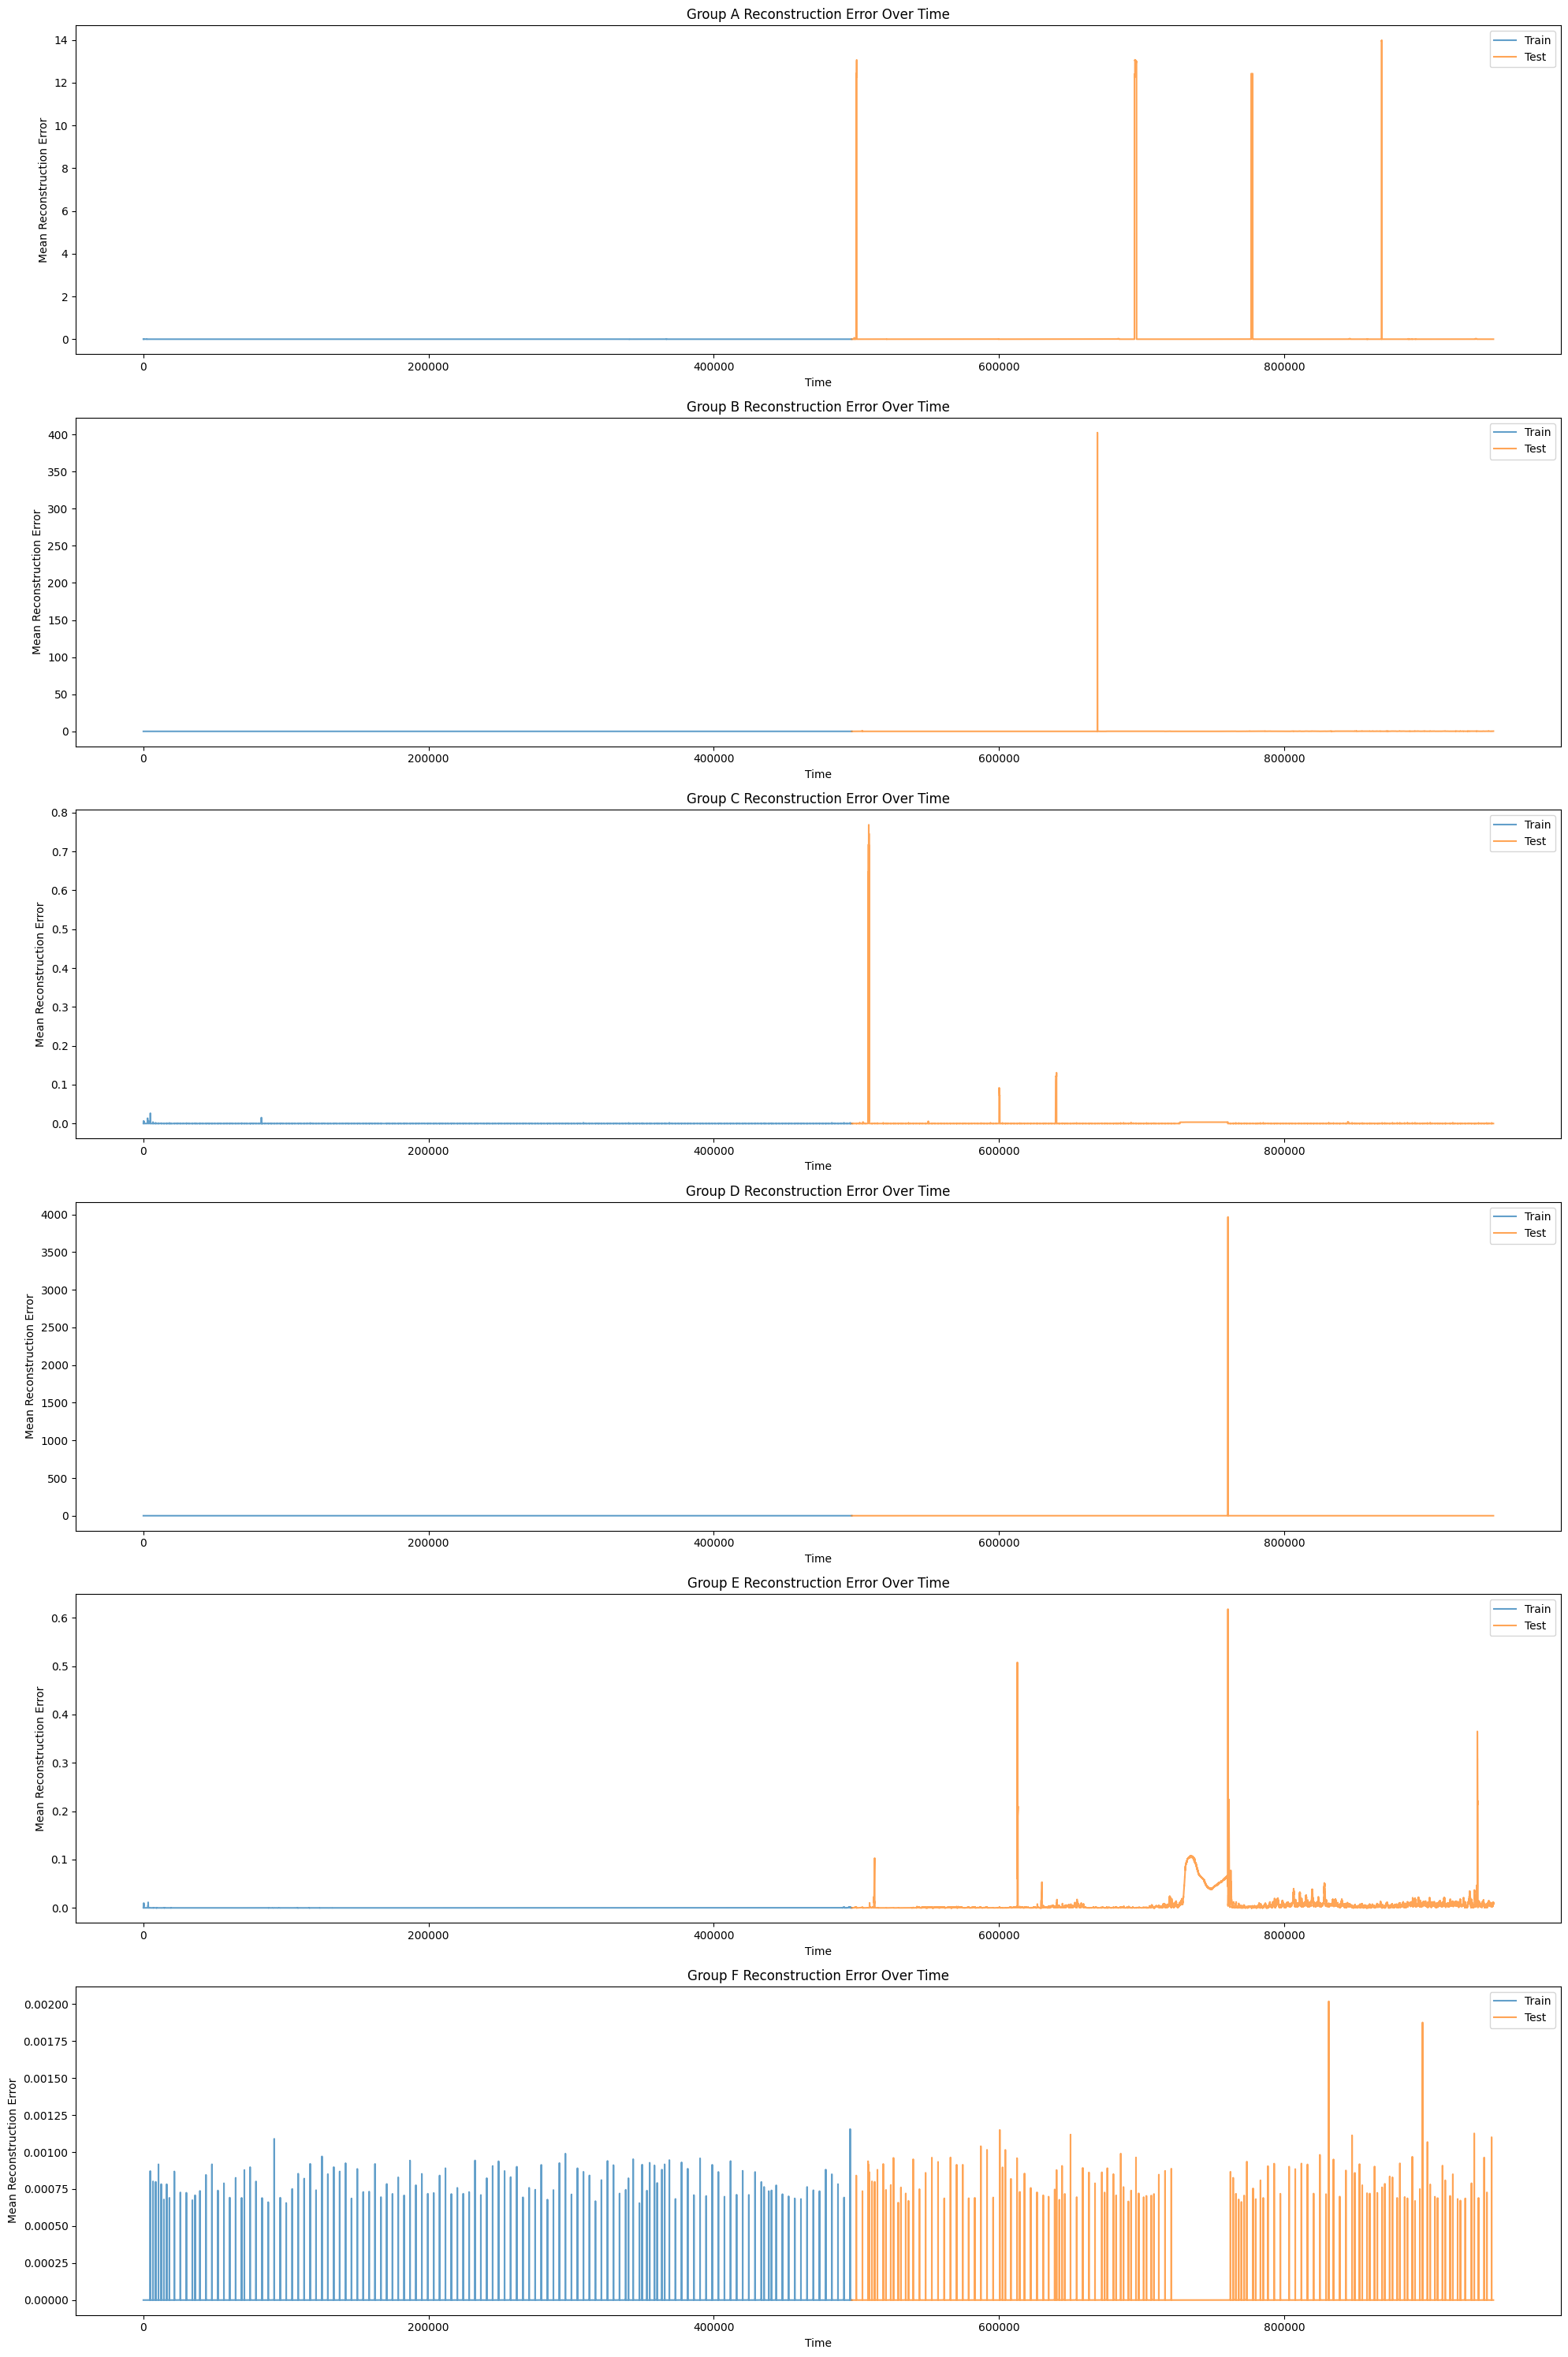

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def calculate_reconstruction_error(model, data):
    predictions = model.predict(data)
    mse = np.mean(np.square(data - predictions), axis=2)
    return mse

plt.figure(figsize=(20, 30))

for idx, group in enumerate(feature_groups.keys(), 1):
    # 모델 로드
    model = tf.keras.models.load_model(f'autoencoder_model_{group}.h5')

    # Train 데이터 가져오기 및 Reconstruction Error 계산
    train_data = globals()[f'TRAIN_WINDOWS_{group}']
    train_error = calculate_reconstruction_error(model, train_data)

    # Test 데이터 가져오기 및 Reconstruction Error 계산
    test_data = globals()[f'TEST_WINDOWS_{group}']
    test_error = calculate_reconstruction_error(model, test_data)

    # 시간 축 생성 (윈도우의 중앙 시점을 기준으로)
    window_size = train_data.shape[1]
    train_time = np.arange(len(train_error)) + window_size // 2
    test_time = np.arange(len(test_error)) + len(train_error) + window_size // 2

    # 그래프 그리기
    plt.subplot(6, 1, idx)
    plt.plot(train_time, np.mean(train_error, axis=1), label='Train', alpha=0.7)
    plt.plot(test_time, np.mean(test_error, axis=1), label='Test', alpha=0.7)
    plt.title(f'Group {group} Reconstruction Error Over Time')
    plt.xlabel('Time')
    plt.ylabel('Mean Reconstruction Error')
    plt.legend()

    # 통계 출력
    print(f"Group {group}:")
    print(f"Train Error - Mean: {np.mean(train_error):.4f}, Std: {np.std(train_error):.4f}")
    print(f"Test Error  - Mean: {np.mean(test_error):.4f}, Std: {np.std(test_error):.4f}")
    print("=" * 50)

plt.tight_layout()
plt.show()

14063/14063 [==============================] - 15s 1ms/step


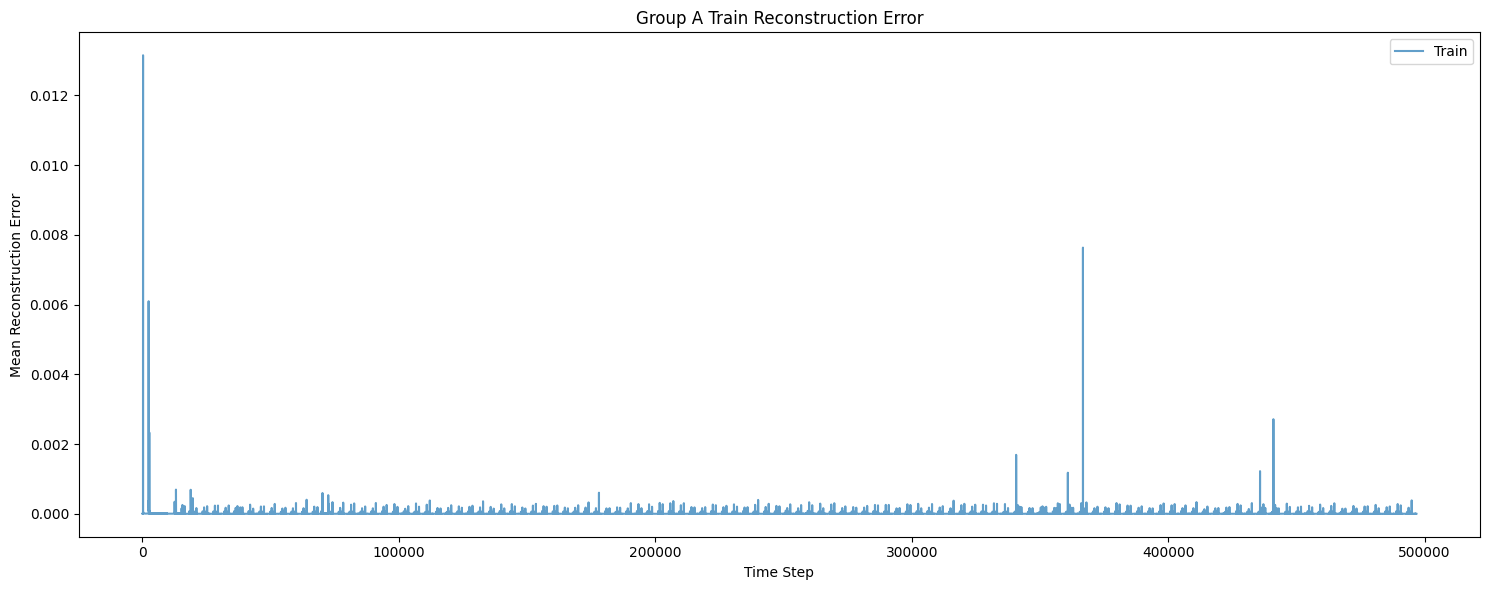

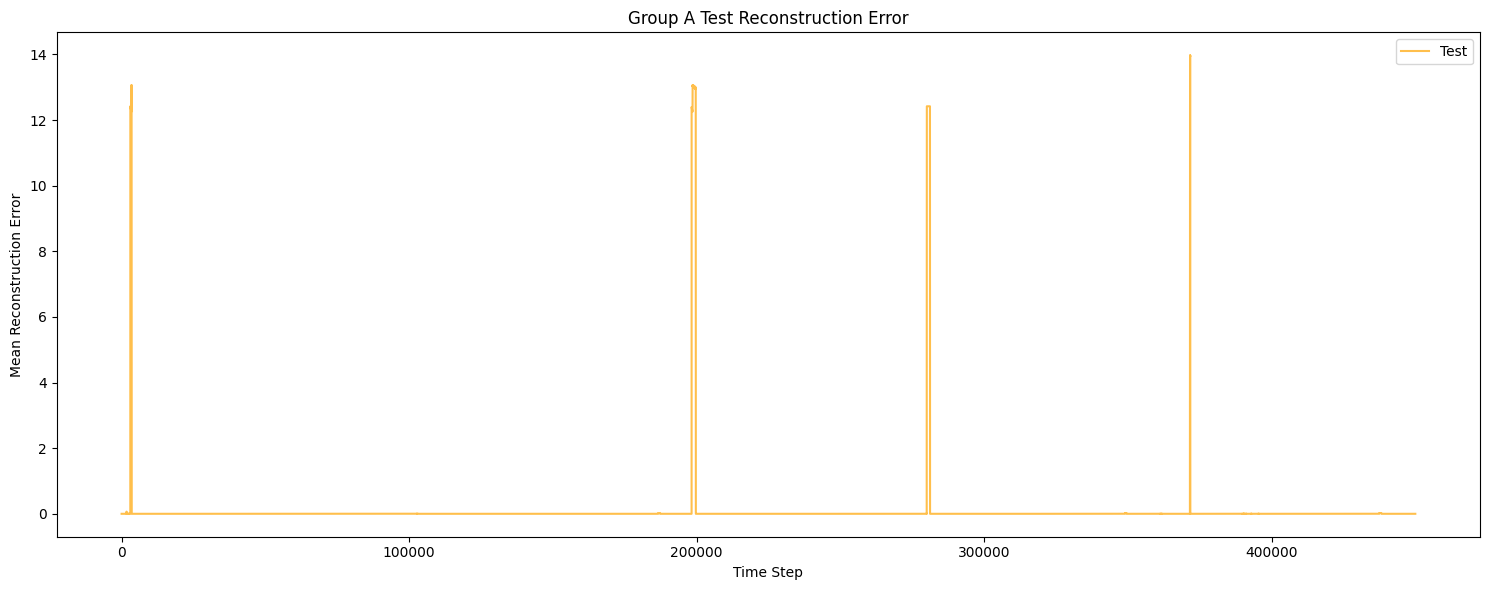

Group A:
Train Error - Mean: 0.0000, Std: 0.0001
Test Error  - Mean: 0.0881, Std: 1.0530


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def calculate_reconstruction_error(model, data):
    predictions = model.predict(data)
    mse = np.mean(np.square(data - predictions), axis=2)
    return mse

# A 그룹 모델 로드
model_A = tf.keras.models.load_model('autoencoder_model_A.h5')

# Train 데이터 가져오기 및 Reconstruction Error 계산
train_data_A = TRAIN_WINDOWS_A
train_error_A = calculate_reconstruction_error(model_A, train_data_A)

# Test 데이터 가져오기 및 Reconstruction Error 계산
test_data_A = TEST_WINDOWS_A
test_error_A = calculate_reconstruction_error(model_A, test_data_A)

# Train 데이터 그래프
plt.figure(figsize=(15, 6))
plt.plot(np.mean(train_error_A, axis=1), label='Train', alpha=0.7)
plt.title('Group A Train Reconstruction Error')
plt.xlabel('Time Step')
plt.ylabel('Mean Reconstruction Error')
plt.legend()
plt.tight_layout()
plt.show()

# Test 데이터 그래프
plt.figure(figsize=(15, 6))
plt.plot(np.mean(test_error_A, axis=1), label='Test', alpha=0.7, color='orange')
plt.title('Group A Test Reconstruction Error')
plt.xlabel('Time Step')
plt.ylabel('Mean Reconstruction Error')
plt.legend()
plt.tight_layout()
plt.show()

# 통계 출력
print("Group A:")
print(f"Train Error - Mean: {np.mean(train_error_A):.4f}, Std: {np.std(train_error_A):.4f}")
print(f"Test Error  - Mean: {np.mean(test_error_A):.4f}, Std: {np.std(test_error_A):.4f}")

14063/14063 [==============================] - 15s 1ms/step


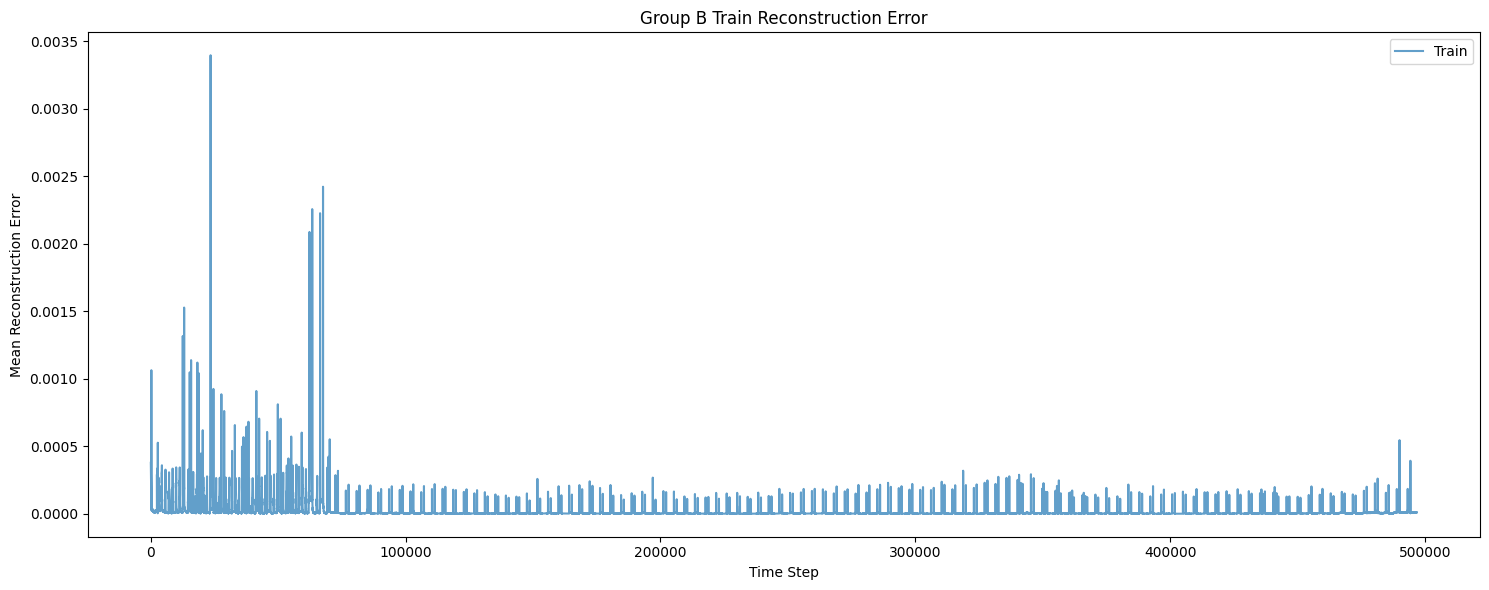

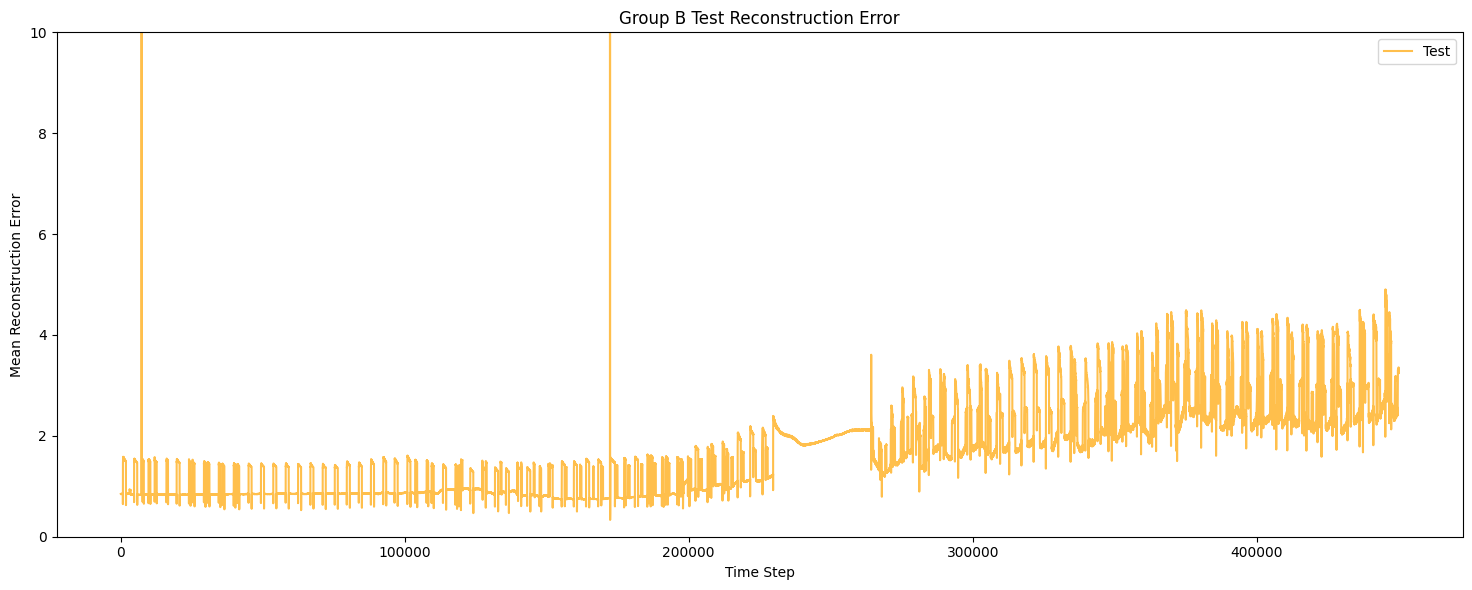

Group B:
Train Error - Mean: 0.0000, Std: 0.0001
Test Error  - Mean: 2.1908, Std: 37.3939


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def calculate_reconstruction_error(model, data):
    predictions = model.predict(data)
    mse = np.mean(np.square(data - predictions), axis=2)
    return mse

# B 그룹 모델 로드
model_B = tf.keras.models.load_model('autoencoder_model_B.h5')

# Train 데이터 가져오기 및 Reconstruction Error 계산
train_data_B = TRAIN_WINDOWS_B
train_error_B = calculate_reconstruction_error(model_B, train_data_B)

# Test 데이터 가져오기 및 Reconstruction Error 계산
test_data_B = TEST_WINDOWS_B
test_error_B = calculate_reconstruction_error(model_B, test_data_B)

# Train 데이터 그래프
plt.figure(figsize=(15, 6))
plt.plot(np.mean(train_error_B, axis=1), label='Train', alpha=0.7)
plt.title('Group B Train Reconstruction Error')
plt.xlabel('Time Step')
plt.ylabel('Mean Reconstruction Error')
plt.legend()
plt.tight_layout()
plt.show()

# Test 데이터 그래프
plt.figure(figsize=(15, 6))
plt.plot(np.mean(test_error_B, axis=1), label='Test', alpha=0.7, color='orange')
plt.title('Group B Test Reconstruction Error')
plt.xlabel('Time Step')
plt.ylabel('Mean Reconstruction Error')
plt.legend()
plt.tight_layout()
plt.ylim(0,10)
plt.show()

# 통계 출력
print("Group B:")
print(f"Train Error - Mean: {np.mean(train_error_B):.4f}, Std: {np.std(train_error_B):.4f}")
print(f"Test Error  - Mean: {np.mean(test_error_B):.4f}, Std: {np.std(test_error_B):.4f}")

14063/14063 [==============================] - 15s 1ms/step


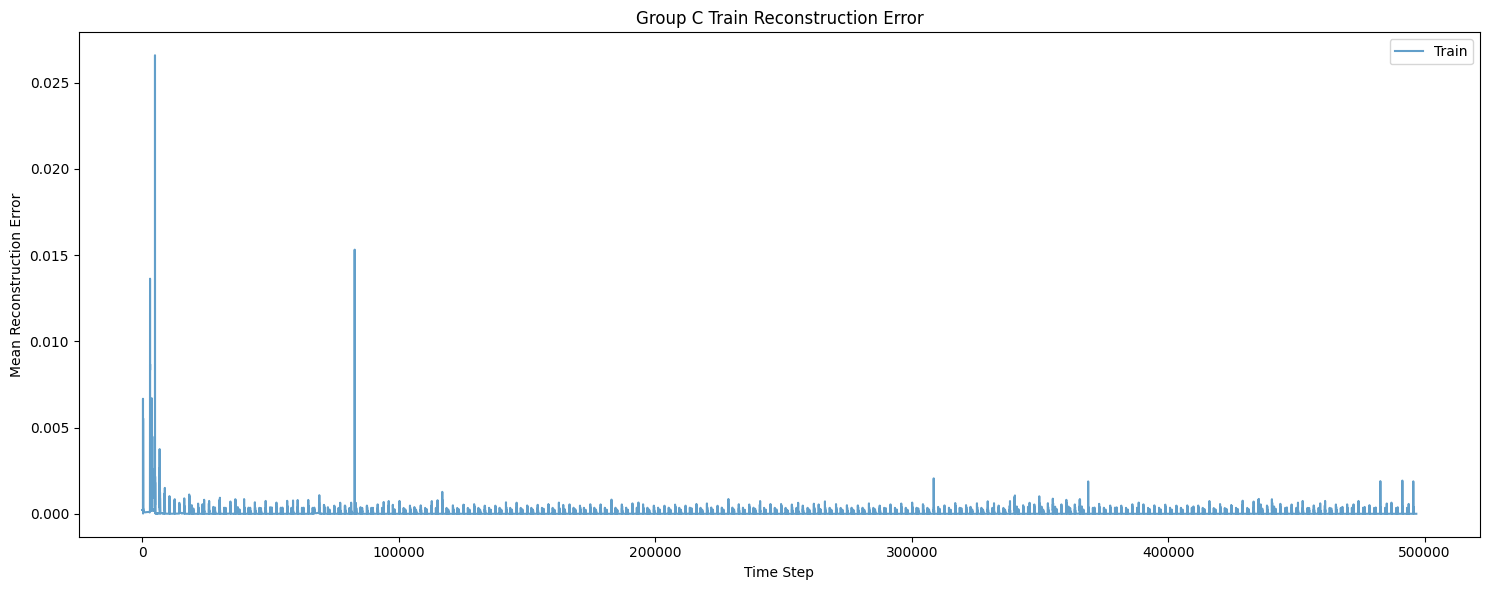

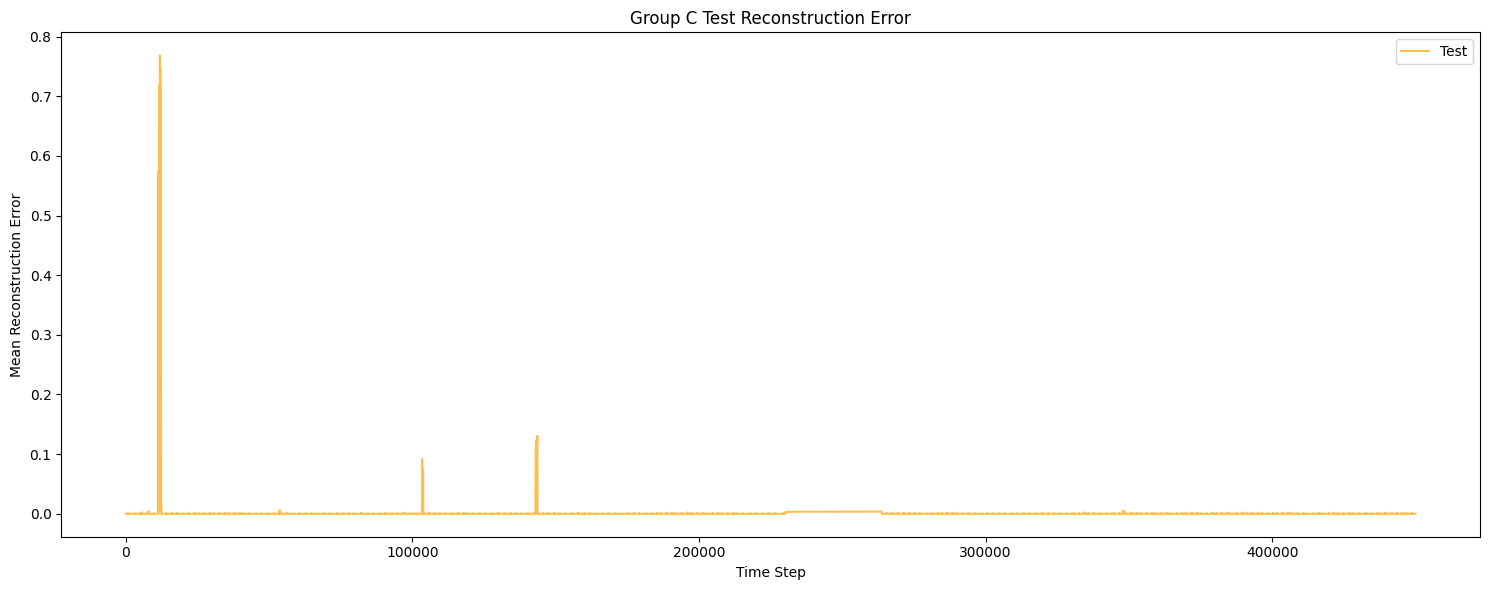

Group C:
Train Error - Mean: 0.0000, Std: 0.0003
Test Error  - Mean: 0.0011, Std: 0.0176


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def calculate_reconstruction_error(model, data):
    predictions = model.predict(data)
    mse = np.mean(np.square(data - predictions), axis=2)
    return mse

# C 그룹 모델 로드
model_C = tf.keras.models.load_model('autoencoder_model_C.h5')

# Train 데이터 가져오기 및 Reconstruction Error 계산
train_data_C = TRAIN_WINDOWS_C
train_error_C = calculate_reconstruction_error(model_C, train_data_C)

# Test 데이터 가져오기 및 Reconstruction Error 계산
test_data_C = TEST_WINDOWS_C
test_error_C = calculate_reconstruction_error(model_C, test_data_C)

# Train 데이터 그래프
plt.figure(figsize=(15, 6))
plt.plot(np.mean(train_error_C, axis=1), label='Train', alpha=0.7)
plt.title('Group C Train Reconstruction Error')
plt.xlabel('Time Step')
plt.ylabel('Mean Reconstruction Error')
plt.legend()
plt.tight_layout()
plt.show()

# Test 데이터 그래프
plt.figure(figsize=(15, 6))
plt.plot(np.mean(test_error_C, axis=1), label='Test', alpha=0.7, color='orange')
plt.title('Group C Test Reconstruction Error')
plt.xlabel('Time Step')
plt.ylabel('Mean Reconstruction Error')
plt.legend()
plt.tight_layout()
plt.show()

# 통계 출력
print("Group C:")
print(f"Train Error - Mean: {np.mean(train_error_C):.4f}, Std: {np.std(train_error_C):.4f}")
print(f"Test Error  - Mean: {np.mean(test_error_C):.4f}, Std: {np.std(test_error_C):.4f}")

14063/14063 [==============================] - 14s 1ms/step


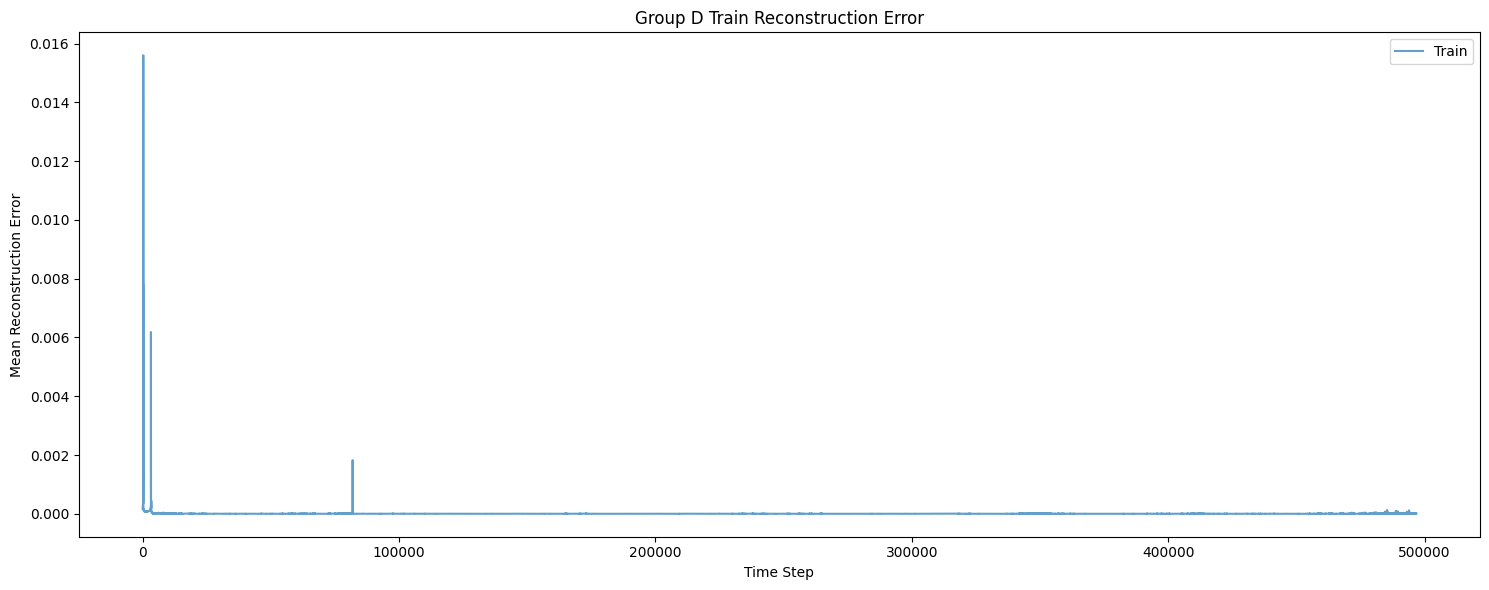

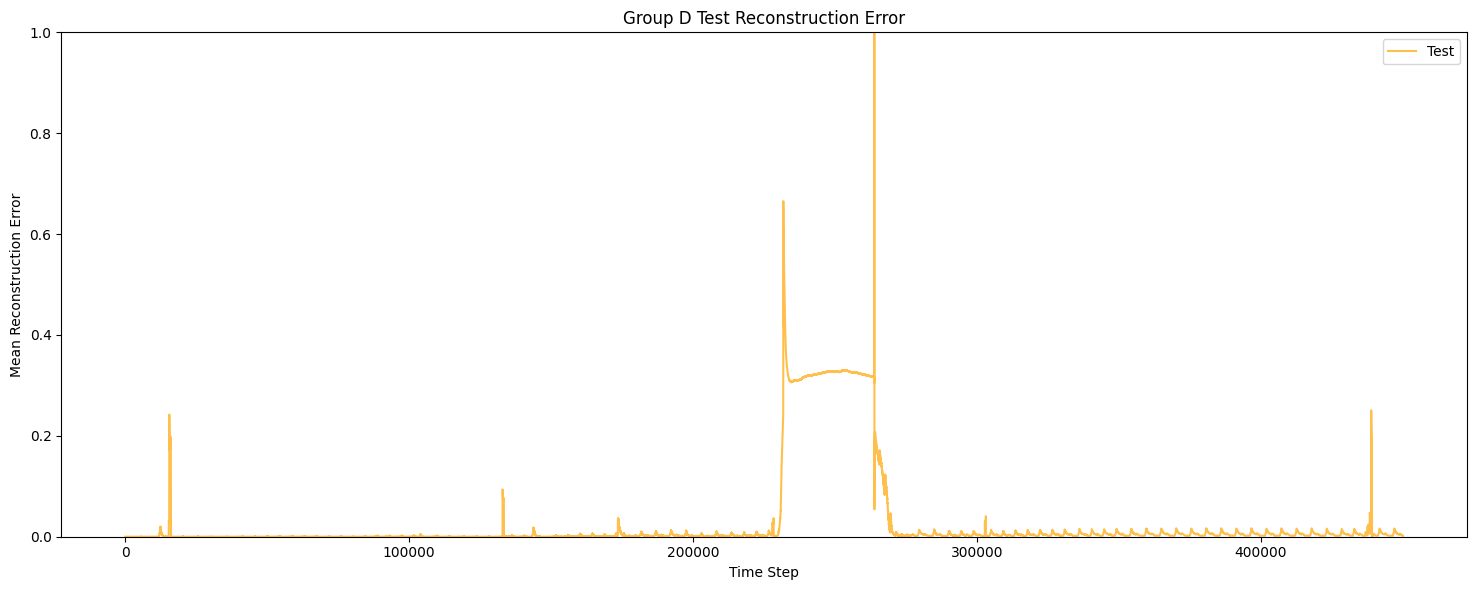

Group D:
Train Error - Mean: 0.0000, Std: 0.0001
Test Error  - Mean: 0.5759, Std: 46.7092


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def calculate_reconstruction_error(model, data):
    predictions = model.predict(data)
    mse = np.mean(np.square(data - predictions), axis=2)
    return mse

# D 그룹 모델 로드
model_D = tf.keras.models.load_model('autoencoder_model_D.h5')

# Train 데이터 가져오기 및 Reconstruction Error 계산
train_data_D = TRAIN_WINDOWS_D
train_error_D = calculate_reconstruction_error(model_D, train_data_D)

# Test 데이터 가져오기 및 Reconstruction Error 계산
test_data_D = TEST_WINDOWS_D
test_error_D = calculate_reconstruction_error(model_D, test_data_D)

# Train 데이터 그래프
plt.figure(figsize=(15, 6))
plt.plot(np.mean(train_error_D, axis=1), label='Train', alpha=0.7)
plt.title('Group D Train Reconstruction Error')
plt.xlabel('Time Step')
plt.ylabel('Mean Reconstruction Error')
plt.legend()
plt.tight_layout()
plt.show()

# Test 데이터 그래프
plt.figure(figsize=(15, 6))
plt.plot(np.mean(test_error_D, axis=1), label='Test', alpha=0.7, color='orange')
plt.title('Group D Test Reconstruction Error')
plt.xlabel('Time Step')
plt.ylabel('Mean Reconstruction Error')
plt.legend()
plt.tight_layout()
plt.ylim(0,1)
plt.show()

# 통계 출력
print("Group D:")
print(f"Train Error - Mean: {np.mean(train_error_D):.4f}, Std: {np.std(train_error_D):.4f}")
print(f"Test Error  - Mean: {np.mean(test_error_D):.4f}, Std: {np.std(test_error_D):.4f}")

14063/14063 [==============================] - 15s 1ms/step


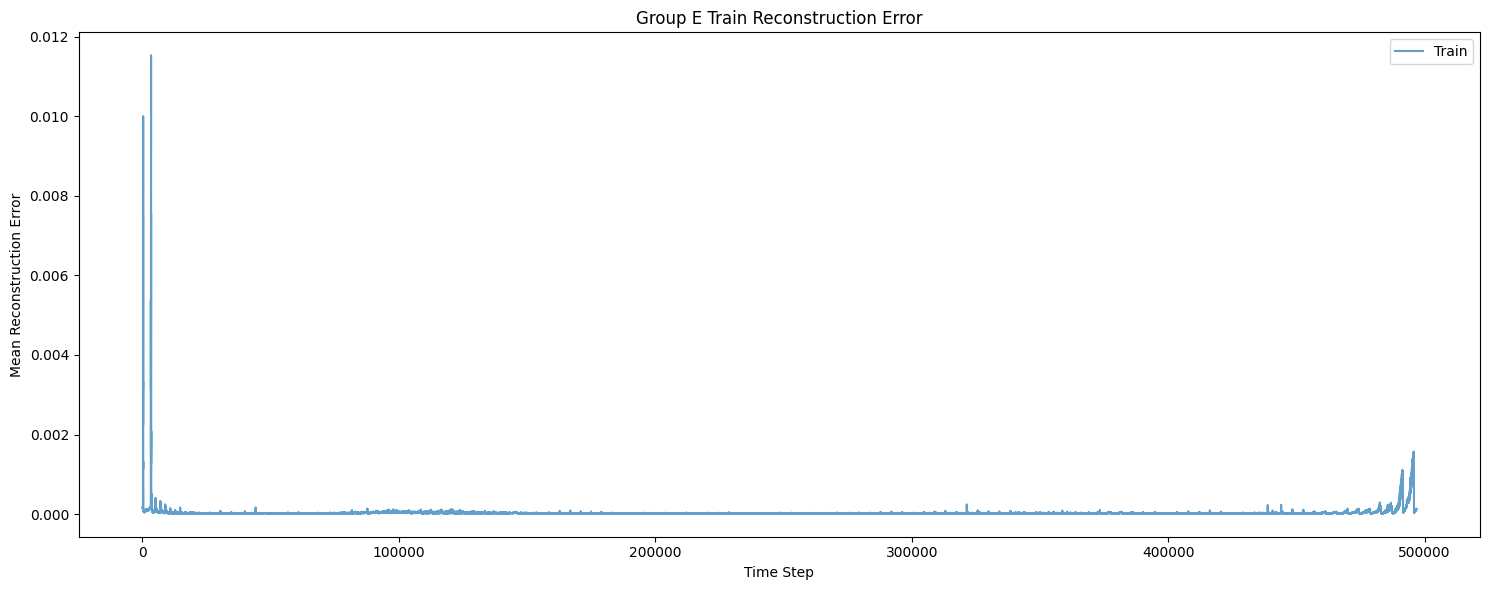

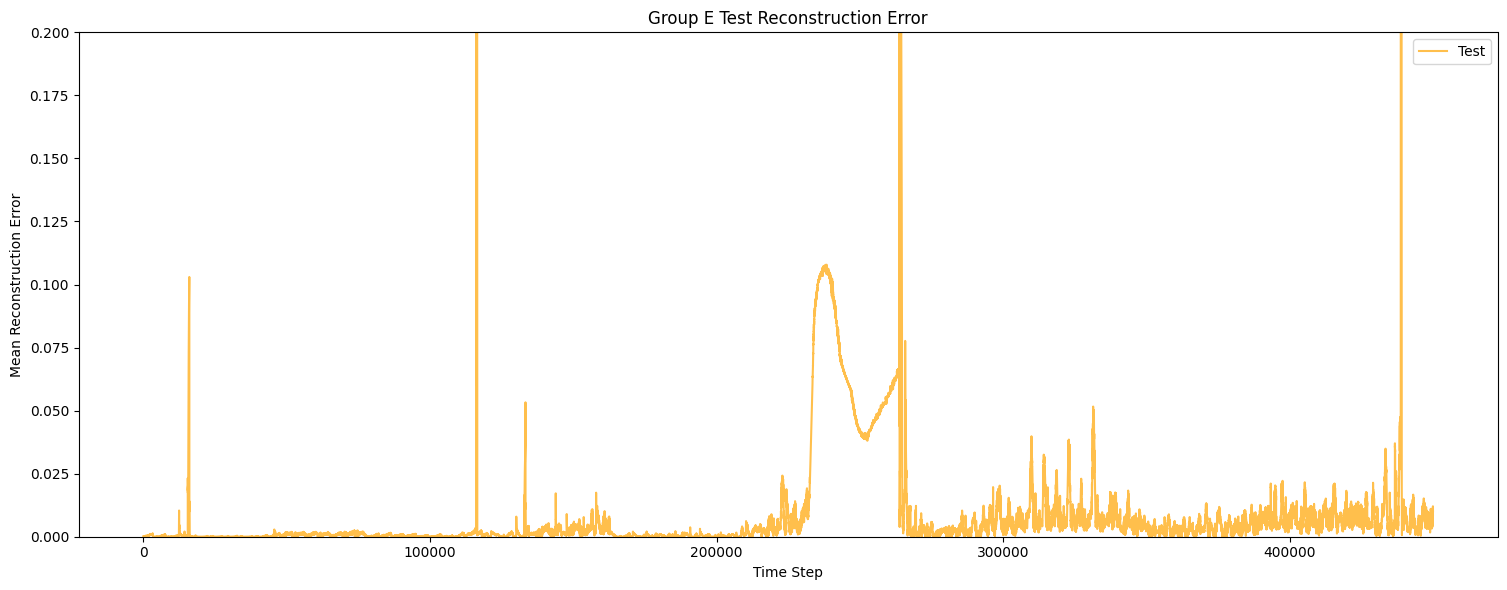

Group E:
Train Error - Mean: 0.0000, Std: 0.0001
Test Error  - Mean: 0.0085, Std: 0.0223


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def calculate_reconstruction_error(model, data):
    predictions = model.predict(data)
    mse = np.mean(np.square(data - predictions), axis=2)
    return mse

# E 그룹 모델 로드
model_E = tf.keras.models.load_model('autoencoder_model_E.h5')

# Train 데이터 가져오기 및 Reconstruction Error 계산
train_data_E = TRAIN_WINDOWS_E
train_error_E = calculate_reconstruction_error(model_E, train_data_E)

# Test 데이터 가져오기 및 Reconstruction Error 계산
test_data_E = TEST_WINDOWS_E
test_error_E = calculate_reconstruction_error(model_E, test_data_E)

# Train 데이터 그래프
plt.figure(figsize=(15, 6))
plt.plot(np.mean(train_error_E, axis=1), label='Train', alpha=0.7)
plt.title('Group E Train Reconstruction Error')
plt.xlabel('Time Step')
plt.ylabel('Mean Reconstruction Error')
plt.legend()
plt.tight_layout()
plt.show()

# Test 데이터 그래프
plt.figure(figsize=(15, 6))
plt.plot(np.mean(test_error_E, axis=1), label='Test', alpha=0.7, color='orange')
plt.title('Group E Test Reconstruction Error')
plt.xlabel('Time Step')
plt.ylabel('Mean Reconstruction Error')
plt.legend()
plt.tight_layout()
plt.ylim(0,0.2)
plt.show()

# 통계 출력
print("Group E:")
print(f"Train Error - Mean: {np.mean(train_error_E):.4f}, Std: {np.std(train_error_E):.4f}")
print(f"Test Error  - Mean: {np.mean(test_error_E):.4f}, Std: {np.std(test_error_E):.4f}")

14063/14063 [==============================] - 16s 1ms/step


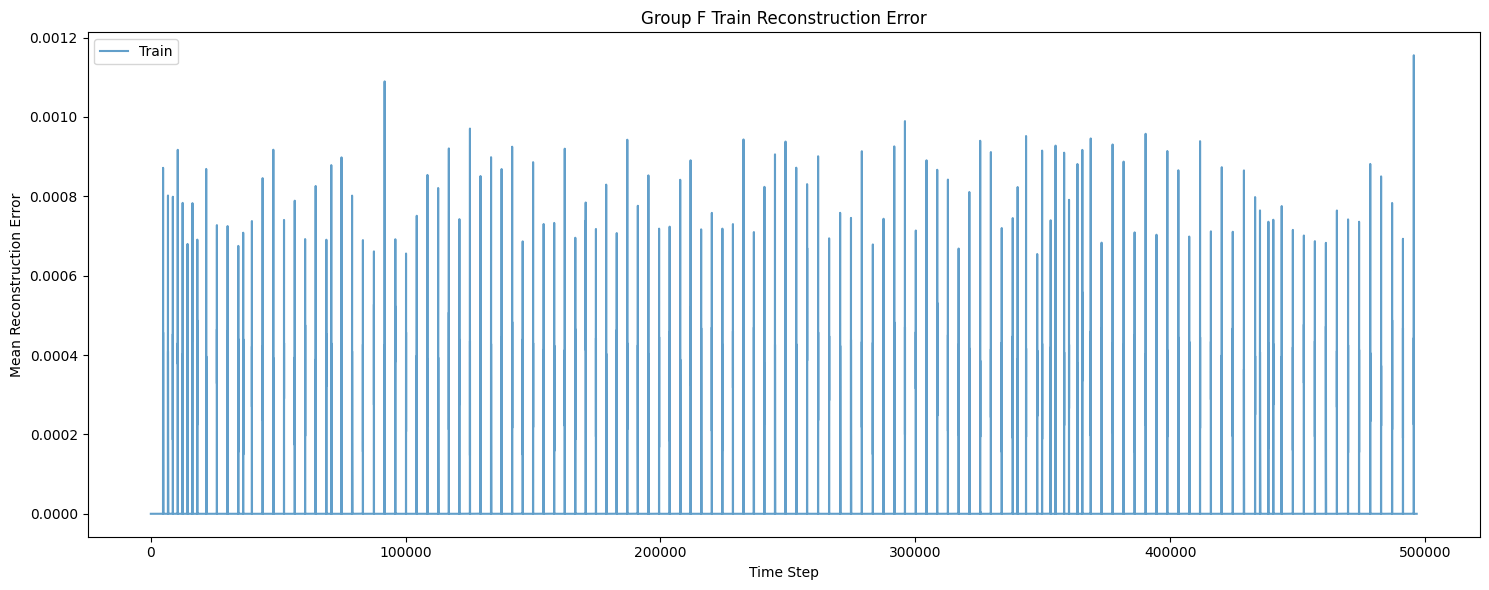

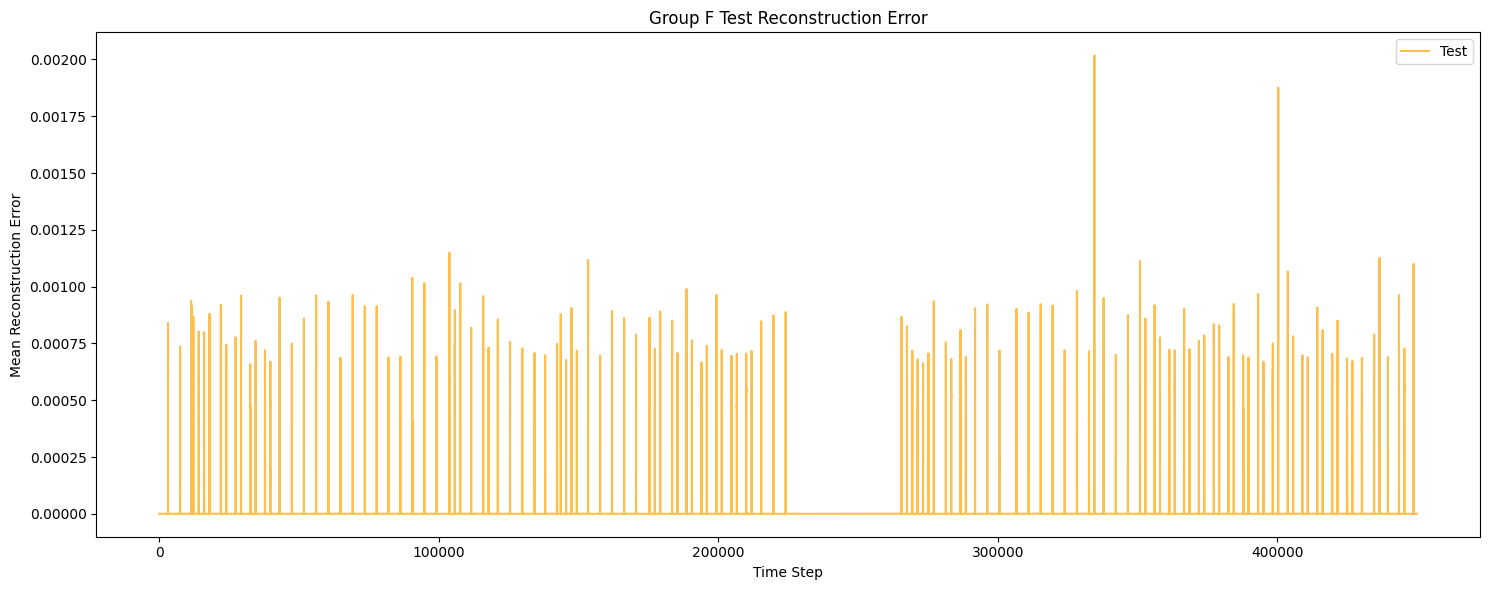

Group F:
Train Error - Mean: 0.0000, Std: 0.0001
Test Error  - Mean: 0.0000, Std: 0.0001


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def calculate_reconstruction_error(model, data):
    predictions = model.predict(data)
    mse = np.mean(np.square(data - predictions), axis=2)
    return mse

# F 그룹 모델 로드
model_F = tf.keras.models.load_model('autoencoder_model_F.h5')

# Train 데이터 가져오기 및 Reconstruction Error 계산
train_data_F = TRAIN_WINDOWS_F
train_error_F = calculate_reconstruction_error(model_F, train_data_F)

# Test 데이터 가져오기 및 Reconstruction Error 계산
test_data_F = TEST_WINDOWS_F
test_error_F = calculate_reconstruction_error(model_F, test_data_F)

# Train 데이터 그래프
plt.figure(figsize=(15, 6))
plt.plot(np.mean(train_error_F, axis=1), label='Train', alpha=0.7)
plt.title('Group F Train Reconstruction Error')
plt.xlabel('Time Step')
plt.ylabel('Mean Reconstruction Error')
plt.legend()
plt.tight_layout()
plt.show()

# Test 데이터 그래프
plt.figure(figsize=(15, 6))
plt.plot(np.mean(test_error_F, axis=1), label='Test', alpha=0.7, color='orange')
plt.title('Group F Test Reconstruction Error')
plt.xlabel('Time Step')
plt.ylabel('Mean Reconstruction Error')
plt.legend()
plt.tight_layout()
plt.show()

# 통계 출력
print("Group F:")
print(f"Train Error - Mean: {np.mean(train_error_F):.4f}, Std: {np.std(train_error_F):.4f}")
print(f"Test Error  - Mean: {np.mean(test_error_F):.4f}, Std: {np.std(test_error_F):.4f}")

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

# 원본 TEST 데이터 로드
TEST_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/test/test.csv")

# Window 크기 설정
WINDOW_SIZE = 12  # 예시 값, 실제 사용한 window size로 변경해야 합니다.

def calculate_reconstruction_error(model, data):
    predictions = model.predict(data)
    mse = np.mean(np.square(data - predictions), axis=2)
    return mse

# 각 그룹에 대한 모델 로드 및 reconstruction error 계산
groups = ['A', 'B', 'C', 'D', 'E', 'F']
test_mse = {}
thresholds = {'A': 2, 'B': 6, 'C': 0.05, 'D': 0.2, 'E': 0.05, 'F': 0.0015}  # 주어진 threshold 값

for group in groups:
    model = tf.keras.models.load_model(f'autoencoder_model_{group}.h5')
    test_data = globals()[f'TEST_WINDOWS_{group}']
    test_mse[group] = calculate_reconstruction_error(model, test_data)

# Anomaly 판단 (직접 threshold와 비교)
anomaly_mask = np.zeros(len(test_mse['A']), dtype=bool)
for group in groups:
    anomaly_mask |= np.any(test_mse[group] >= thresholds[group], axis=1)

# 제출용 데이터프레임 초기화 (모든 값을 0으로 설정)
submission_df = pd.DataFrame({
    'Timestamp': TEST_DF_RAW['Timestamp'],
    'anomaly': 0
})

# WINDOW_SIZE - 1만큼의 앞부분은 0으로 유지하고, 그 이후부터 모델의 예측 결과 적용
submission_df.loc[WINDOW_SIZE-1:, 'anomaly'] = np.where(anomaly_mask, 1, 0)

# CSV 파일로 저장
submission_df.to_csv('sample_submission.csv', index=False)

print("제출 파일이 생성되었습니다: sample_submission.csv")

# 결과 요약
anomaly_count = np.sum(submission_df['anomaly'])
print(f"\n총 데이터 포인트 수: {len(TEST_DF_RAW)}")
print(f"이상 탐지된 데이터 포인트 수: {anomaly_count}")
print(f"정상으로 판단된 데이터 포인트 수: {len(TEST_DF_RAW) - anomaly_count}")

# 각 그룹별 anomaly 비율 출력
print("\n각 그룹별 anomaly 비율:")
for group in groups:
    group_anomaly = np.any(test_mse[group] >= thresholds[group], axis=1)
    group_anomaly_ratio = np.mean(group_anomaly) * 100
    print(f"Group {group}: {group_anomaly_ratio:.2f}%")

14063/14063 [==============================] - 19s 1ms/step
제출 파일이 생성되었습니다: sample_submission.csv

총 데이터 포인트 수: 450000
이상 탐지된 데이터 포인트 수: 43816
정상으로 판단된 데이터 포인트 수: 406184

각 그룹별 anomaly 비율:
Group A: 0.70%
Group B: 0.06%
Group C: 0.42%
Group D: 7.87%
Group E: 7.66%
Group F: 0.37%
